In [13]:
import pandas as pd

In [20]:
df = pd.read_csv('Yemen.csv')
df = df.drop_duplicates()

# Removed unused columns
df.drop(["Pop", "PopNmbr", "DmgrphCode", "SvyDate"], axis = 1, inplace = True) 

# Rename columns
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "rCSI"}, inplace = True)

# Convert date string to datetime object
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 

print(sorted(df["AdminStrata"].unique()))


['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz']


In [15]:
# Group dataframe by administrative regions
df = df.groupby(["AdminStrata"]).apply(lambda x: x.set_index("Datetime").resample("D").mean()).reset_index()

# Set index to Datetime
df = df.set_index(['Datetime', 'AdminStrata']).unstack("AdminStrata").reorder_levels([1,0], axis=1).sort_index(axis=1, level=[0,1])
df.columns.rename("Index", level=1, inplace=True)

In [16]:
df.head()

AdminStrata,Abyan,Aden,Al Bayda,Al Dhale'e,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amanat Al Asimah,Amran,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'ada,Sana'a,Shabwah,Socotra,Taizz
Index,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,...,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI,rCSI
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-22,37.421880,35.628421,39.101832,43.976194,52.097359,61.911549,16.898433,61.867752,52.923223,51.085993,...,66.698570,60.797456,44.782684,60.490004,56.301100,46.435518,52.667849,34.302200,38.303104,50.919038
2018-08-23,37.346207,30.467806,38.444610,44.524081,53.395195,67.312845,16.219712,61.391407,54.706540,47.318314,...,61.331133,61.011650,44.038726,59.568557,57.324106,45.261947,50.214606,36.742499,39.545071,50.415852
2018-08-24,37.999408,23.654949,37.490035,47.873316,53.570209,69.709398,10.537077,61.690347,50.879466,46.794309,...,62.286205,62.032249,43.296925,58.277608,57.417614,44.520462,50.073157,35.857748,41.867782,49.391298
2018-08-25,36.068234,21.326038,35.308107,47.480356,53.126038,72.057616,14.361314,63.180147,47.709892,42.931099,...,59.525377,60.993741,42.149079,56.908462,55.324169,46.345940,48.791655,34.658434,48.585591,50.302392
2018-08-26,38.218464,22.310512,38.234575,48.670002,52.186640,71.038543,22.775805,62.642574,47.759726,44.033304,...,59.384136,58.800240,42.146629,57.722567,57.666522,43.294599,48.839640,35.913080,48.662394,50.293046


In [17]:
# interpolate missing values using cubic spline
df_interpolate = df.groupby(axis=1, level=["AdminStrata"], group_keys=False).apply(lambda x: x.interpolate(method="cubic"))
df_interpolate.isnull().sum().sum()

C:\Users\malco\AppData\Local\Temp\ipykernel_22148\3049970325.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_interpolate = df.groupby(axis=1, level=["AdminStrata"], group_keys=False).apply(lambda x: x.interpolate(method="cubic"))


0

<Axes: title={'center': 'Yemen'}, xlabel='Date', ylabel='rCSI'>

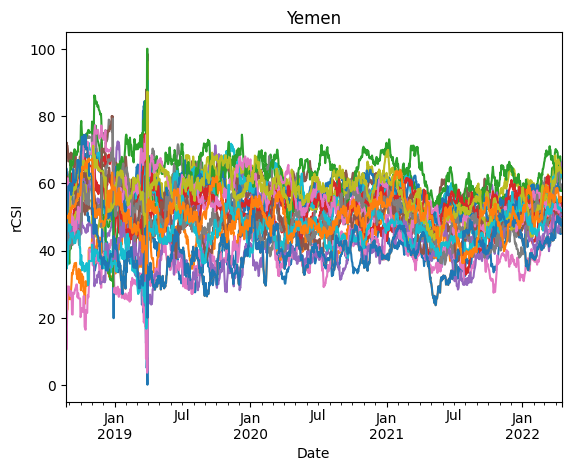

In [18]:
df_interpolate.plot(title="Yemen", legend=False, xlabel="Date", ylabel="rCSI")

In [19]:
df_interpolate.to_csv("../Time Series/rCSI.csv", index_label=False)